In [50]:
'''
Predict the quality of wine based on different given features.
'''

'\nPredict the quality of wine based on different given features.\n'

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv("winequality-red.csv",sep=";")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [53]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [54]:
df.info() # no nulls, no object datatype cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
df.describe()
# skewness-total sulfur dioxide,

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


fixed acidity  :  0.9818292953262073


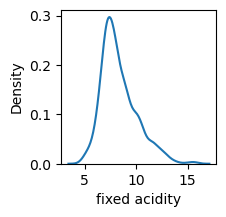

volatile acidity  :  0.6709623963499574


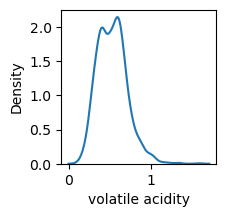

citric acid  :  0.3180385895475358


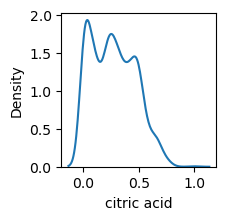

residual sugar  :  4.536394788805638


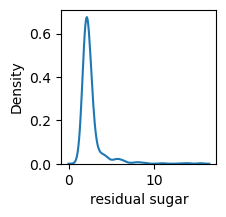

chlorides  :  5.675016527504259


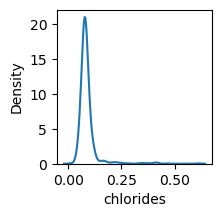

free sulfur dioxide  :  1.249393847434253


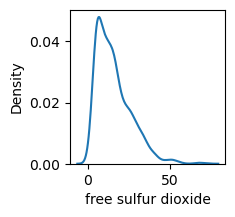

total sulfur dioxide  :  1.5141091878506638


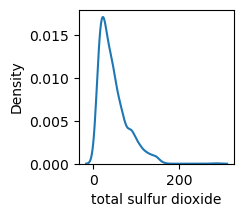

density  :  0.07122077153539946


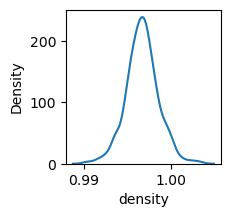

pH  :  0.19350175891005525


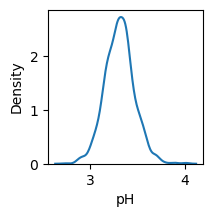

sulphates  :  2.426393455449087


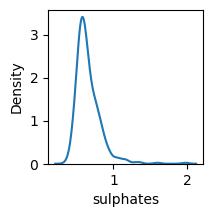

alcohol  :  0.8600210646566755


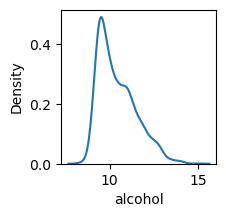

quality  :  0.21759720553467285


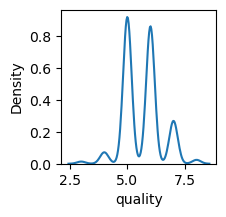

In [56]:
from scipy.stats import skew
for i in df.columns:
    print(i," : ",skew(df[i]))
    plt.figure(figsize=(2,2))
    sns.kdeplot(df[i])
    plt.show()

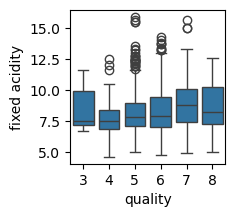

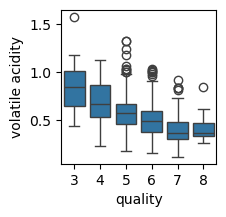

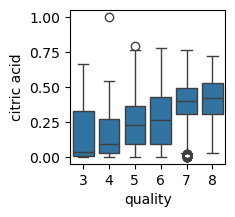

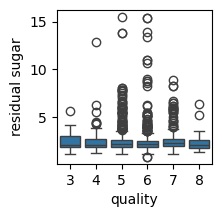

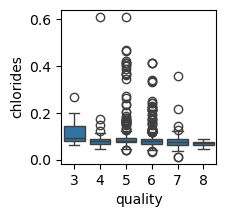

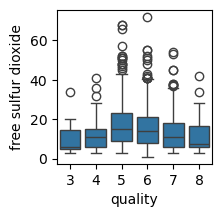

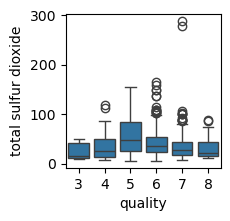

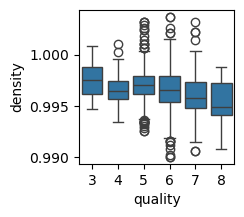

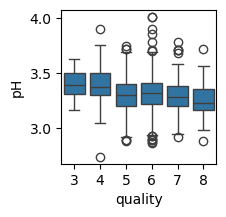

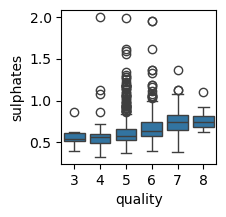

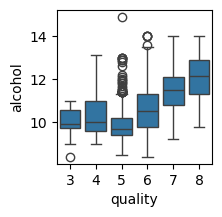

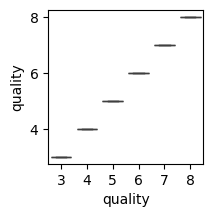

In [57]:
for i in df.columns:
    plt.figure(figsize=(2,2))
    sns.boxplot(data=df,x="quality",y=i)
    plt.show()

In [58]:
features=df.drop("quality",axis=1)
target=df["quality"]

In [59]:
from sklearn.model_selection import train_test_split
# putting stratify because target is imbalanced. 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.15)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((1359, 11), (1359,))
Testing data : ((240, 11), (240,))


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    # checking overfitting underfitting
    training_score=model.score(xtrain,ytrain)
    testing_score=model.score(xtest,ytest)
    print(f"Training Score : {training_score}")
    print(f"Testing Score : {testing_score}")
    print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
    # classification report
    print(f"Classification Report : \n{classification_report(ytest,ypred)}")
    return model


In [62]:
dt=mymodel(DecisionTreeClassifier()) # overfitting
dt

Training Score : 1.0
Testing Score : 0.6291666666666667
Confusion Matrix : 
[[ 0  0  1  0  0  0]
 [ 0  1  5  1  1  0]
 [ 0  1 77 24  6  0]
 [ 1  2 15 54 15  2]
 [ 0  2  1  4 19  1]
 [ 0  0  0  2  5  0]]
Classification Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.12      0.14         8
           5       0.78      0.71      0.74       108
           6       0.64      0.61      0.62        89
           7       0.41      0.70      0.52        27
           8       0.00      0.00      0.00         7

    accuracy                           0.63       240
   macro avg       0.33      0.36      0.34       240
weighted avg       0.64      0.63      0.63       240



DecisionTreeClassifier()

In [63]:
dt.feature_importances_

array([0.05109535, 0.07944242, 0.07166735, 0.06525369, 0.10111274,
       0.05394601, 0.11741826, 0.08145754, 0.05983654, 0.14058528,
       0.1781848 ])

In [64]:
xtrain.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [65]:
dt.get_depth()

19

In [66]:
dt=mymodel(DecisionTreeClassifier(max_depth=15,min_samples_leaf=8)) # pruning technique
dt

Training Score : 0.7593818984547461
Testing Score : 0.5625
Confusion Matrix : 
[[ 0  1  0  0  0  0]
 [ 0  0  5  2  1  0]
 [ 0  3 70 34  1  0]
 [ 0  0 31 54  4  0]
 [ 0  0  3 13 11  0]
 [ 0  0  1  3  3  0]]
Classification Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.64      0.65      0.64       108
           6       0.51      0.61      0.55        89
           7       0.55      0.41      0.47        27
           8       0.00      0.00      0.00         7

    accuracy                           0.56       240
   macro avg       0.28      0.28      0.28       240
weighted avg       0.54      0.56      0.55       240



DecisionTreeClassifier(max_depth=15, min_samples_leaf=8)

In [67]:
#imbalanced dataset -- stratify
# random over sampler, or random under sampler

In [68]:
df[df["quality"]==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [69]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [70]:
from imblearn.over_sampling import RandomOverSampler
# different techniques to produce dummy data are randomoversampler,randomundersampler,smote
# smote-- synthetic minority oversampling technique
# randomover sampler randomly duplicate samples from minority class to balance the class distribution.

In [71]:
ros=RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)
ysample.value_counts()

quality
6    573
5    573
7    573
3    573
4    573
8    573
Name: count, dtype: int64

In [72]:
dt=DecisionTreeClassifier(max_depth=15, min_samples_leaf=8)
dt.fit(xsample,ysample)
ypred=dt.predict(xtest)
# checking overfitting underfitting
training_score=dt.score(xsample,ysample)
testing_score=dt.score(xtest,ytest)
print(f"Training Score : {training_score}")
print(f"Testing Score : {testing_score}")
print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
# classification report
print(f"Classification Report : \n{classification_report(ytest,ypred)}")

Training Score : 0.8830715532286213
Testing Score : 0.48333333333333334
Confusion Matrix : 
[[ 0  0  1  0  0  0]
 [ 0  0  5  2  1  0]
 [ 1 11 64 29  3  0]
 [ 1  8 26 37 14  3]
 [ 0  0  1 12 14  0]
 [ 0  0  0  3  3  1]]
Classification Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.66      0.59      0.62       108
           6       0.45      0.42      0.43        89
           7       0.40      0.52      0.45        27
           8       0.25      0.14      0.18         7

    accuracy                           0.48       240
   macro avg       0.29      0.28      0.28       240
weighted avg       0.51      0.48      0.50       240



In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,max_depth=15) # hyperparameter tuning
rf.fit(xsample,ysample)
ypred=rf.predict(xtest)
training_score=rf.score(xsample,ysample)
testing_score=rf.score(xtest,ytest)
print(f"Training Score : {training_score}")
print(f"Testing Score : {testing_score}")
print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
# classification report
print(f"Classification Report : \n{classification_report(ytest,ypred)}")

Training Score : 0.9994182664339732
Testing Score : 0.6708333333333333
Confusion Matrix : 
[[ 0  1  0  0  0  0]
 [ 1  0  4  3  0  0]
 [ 1  2 82 23  0  0]
 [ 0  1 18 63  7  0]
 [ 0  0  1 10 16  0]
 [ 0  0  0  2  5  0]]
Classification Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.78      0.76      0.77       108
           6       0.62      0.71      0.66        89
           7       0.57      0.59      0.58        27
           8       0.00      0.00      0.00         7

    accuracy                           0.67       240
   macro avg       0.33      0.34      0.34       240
weighted avg       0.65      0.67      0.66       240



In [109]:
# as given in the data description,or lack of datat support for certain categories,
# converting multiclass classification into binary class classification

In [113]:
def multi_to_bin(x):
    if x>=6:
        return 1
    else:
        return 0

In [117]:
df["qualtiy_binary"]=df["quality"].apply(multi_to_bin)
df["qualtiy_binary"].value_counts()

qualtiy_binary
1    855
0    744
Name: count, dtype: int64

In [119]:
features=df.drop(["qualtiy_binary","quality"],axis=1)
target=df["qualtiy_binary"]
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.15)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((1359, 11), (1359,))
Testing data : ((240, 11), (240,))


In [121]:
dt=mymodel(DecisionTreeClassifier()) # overfitting
dt

Training Score : 1.0
Testing Score : 0.7166666666666667
Confusion Matrix : 
[[78 39]
 [29 94]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       117
           1       0.71      0.76      0.73       123

    accuracy                           0.72       240
   macro avg       0.72      0.72      0.72       240
weighted avg       0.72      0.72      0.72       240



DecisionTreeClassifier()

In [125]:
rf=mymodel(RandomForestClassifier(n_estimators=70,max_depth=15))
rf

Training Score : 1.0
Testing Score : 0.8208333333333333
Confusion Matrix : 
[[ 92  25]
 [ 18 105]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       117
           1       0.81      0.85      0.83       123

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240



RandomForestClassifier(max_depth=15, n_estimators=70)